In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/workspaces/Repository_Data_Science_Challenges/Desafios/F1/Data/Base.csv")

In [4]:
df2024 = df[df['year']==2024]

In [5]:
df2024

,Unnamed: 0,raceId,year,date,name,forename,driverRef,grid,position,points
0,26120,1144,2024,2024-12-08,Abu Dhabi Grand Prix,Lando,norris,1,1,25.0
1,25263,1144,2024,2024-12-08,Abu Dhabi Grand Prix,Carlos,sainz,3,2,18.0
2,25971,1144,2024,2024-12-08,Abu Dhabi Grand Prix,Charles,leclerc,19,3,15.0
3,355,1144,2024,2024-12-08,Abu Dhabi Grand Prix,Lewis,hamilton,16,4,12.0
4,26248,1144,2024,2024-12-08,Abu Dhabi Grand Prix,George,russell,6,5,10.0
...,...,...,...,...,...,...,...,...,...,...
474,23028,1121,2024,2024-03-02,Bahrain Grand Prix,Nico,hulkenberg,10,16,0.0
475,25545,1121,2024,2024-03-02,Bahrain Grand Prix,Esteban,ocon,19,17,0.0
476,20734,1121,2024,2024-03-02,Bahrain Grand Prix,Pierre,gasly,20,18,0.0
477,24315,1121,2024,2024-03-02,Bahrain Grand Prix,Valtteri,bottas,16,19,0.0


In [6]:
Points2024 = df2024[['date', 'name', 'forename', 'points']]

In [7]:
Points2024

,date,name,forename,points
0,2024-12-08,Abu Dhabi Grand Prix,Lando,25.0
1,2024-12-08,Abu Dhabi Grand Prix,Carlos,18.0
2,2024-12-08,Abu Dhabi Grand Prix,Charles,15.0
3,2024-12-08,Abu Dhabi Grand Prix,Lewis,12.0
4,2024-12-08,Abu Dhabi Grand Prix,George,10.0
...,...,...,...,...
474,2024-03-02,Bahrain Grand Prix,Nico,0.0
475,2024-03-02,Bahrain Grand Prix,Esteban,0.0
476,2024-03-02,Bahrain Grand Prix,Pierre,0.0
477,2024-03-02,Bahrain Grand Prix,Valtteri,0.0


In [8]:
# Adiciona a soma acumulada como uma coluna no DataFrame original para facilitar o uso em gráficos
df_grouped = Points2024.groupby(by=['forename', 'date']).sum().reset_index()
df_grouped['cumulative_points'] = df_grouped.groupby('forename')['points'].cumsum()

df_grouped


,forename,date,name,points,cumulative_points
0,Alexander,2024-03-02,Bahrain Grand Prix,0.0,0.0
1,Alexander,2024-03-09,Saudi Arabian Grand Prix,0.0,0.0
2,Alexander,2024-03-24,Australian Grand Prix,0.0,0.0
3,Alexander,2024-04-07,Japanese Grand Prix,0.0,0.0
4,Alexander,2024-04-21,Chinese Grand Prix,0.0,0.0
...,...,...,...,...,...
474,Yuki,2024-10-27,Mexico City Grand Prix,0.0,21.0
475,Yuki,2024-11-03,São Paulo Grand Prix,6.0,27.0
476,Yuki,2024-11-23,Las Vegas Grand Prix,2.0,29.0
477,Yuki,2024-12-01,Qatar Grand Prix,0.0,29.0


In [9]:
df_grouped['cumulative_points'] = df_grouped['cumulative_points'].astype(int)

In [40]:
df_pivot = df_grouped.pivot(index = 'date', columns = 'forename', values = 'cumulative_points')

In [33]:
df_pivot.fillna(0, inplace= True)
df_pivot

forename,Alexander,Carlos,Charles,Daniel,Esteban,Fernando,Franco,George,Guanyu,Jack,...,Liam,Logan,Max,Nico,Oliver,Oscar,Pierre,Sergio,Valtteri,Yuki
date,,,,,,,,,,,,,,,,,,,,,
2024-03-02,0.0,15.0,12.0,0.0,0.0,2.0,0.0,10.0,0.0,0.0,...,0.0,0.0,26.0,0.0,0.0,4.0,0.0,18.0,0.0,0.0
2024-03-09,0.0,0.0,28.0,0.0,0.0,12.0,0.0,18.0,0.0,0.0,...,0.0,0.0,51.0,1.0,6.0,16.0,0.0,36.0,0.0,0.0
2024-03-24,0.0,40.0,47.0,0.0,0.0,16.0,0.0,18.0,0.0,0.0,...,0.0,0.0,51.0,3.0,0.0,28.0,0.0,46.0,0.0,6.0
2024-04-07,0.0,55.0,59.0,0.0,0.0,24.0,0.0,24.0,0.0,0.0,...,0.0,0.0,77.0,3.0,0.0,32.0,0.0,64.0,0.0,7.0
2024-04-21,0.0,65.0,71.0,0.0,0.0,31.0,0.0,32.0,0.0,0.0,...,0.0,0.0,102.0,4.0,0.0,36.0,0.0,79.0,0.0,7.0
2024-05-05,0.0,75.0,86.0,0.0,1.0,33.0,0.0,36.0,0.0,0.0,...,0.0,0.0,120.0,4.0,0.0,36.0,0.0,91.0,0.0,13.0
2024-05-19,0.0,85.0,101.0,0.0,1.0,33.0,0.0,43.0,0.0,0.0,...,0.0,0.0,145.0,4.0,0.0,48.0,0.0,95.0,0.0,14.0
2024-05-26,2.0,100.0,126.0,0.0,1.0,33.0,0.0,53.0,0.0,0.0,...,0.0,0.0,153.0,4.0,0.0,66.0,1.0,95.0,0.0,18.0
2024-06-09,2.0,100.0,126.0,4.0,2.0,41.0,0.0,68.0,0.0,0.0,...,0.0,0.0,178.0,4.0,0.0,76.0,3.0,95.0,0.0,18.0


In [69]:
cores_por_piloto = {
    # Red Bull Racing
    'Max': "#831010",
    'Sergio': '#831010',

    # Mercedes
    'Lewis': '#27F4D2',
    'George': '#27F4D2',

    # Ferrari
    'Charles': '#E80020',
    'Carlos': '#E80020',
    'Oliver': '#E80020',

    # McLaren
    'Lando': '#FF8000',
    'Oscar': '#FF8000',

    # Aston Martin
    'Fernando': '#229971',
    'Lance': '#229971',

    # Alpine
    'Esteban': '#0093CC',
    'Pierre': '#0093CC',
    'Jack': '#0093CC',

    # Williams
    'Alexander': '#64C4FF',
    'Logan': '#64C4FF',
    'Franco': '#64C4FF',

    # Visa Cash App RB (Racing Bulls)
    'Daniel': '#6692FF',
    'Yuki': '#6692FF',
    'Liam': '#6692FF',

    # Kick Sauber
    'Valtteri': '#52E252',
    'Guanyu': '#52E252',

    # Haas
    'Kevin': '#B6BABD',
    'Nico': '#B6BABD'
}

In [71]:
cores = Points2024['forename'].map(cores_por_piloto)
print(cores.isna().sum())  
print(Points2024[cores.isna()]) 

0
Empty DataFrame
Columns: [date, name, forename, points]
Index: []


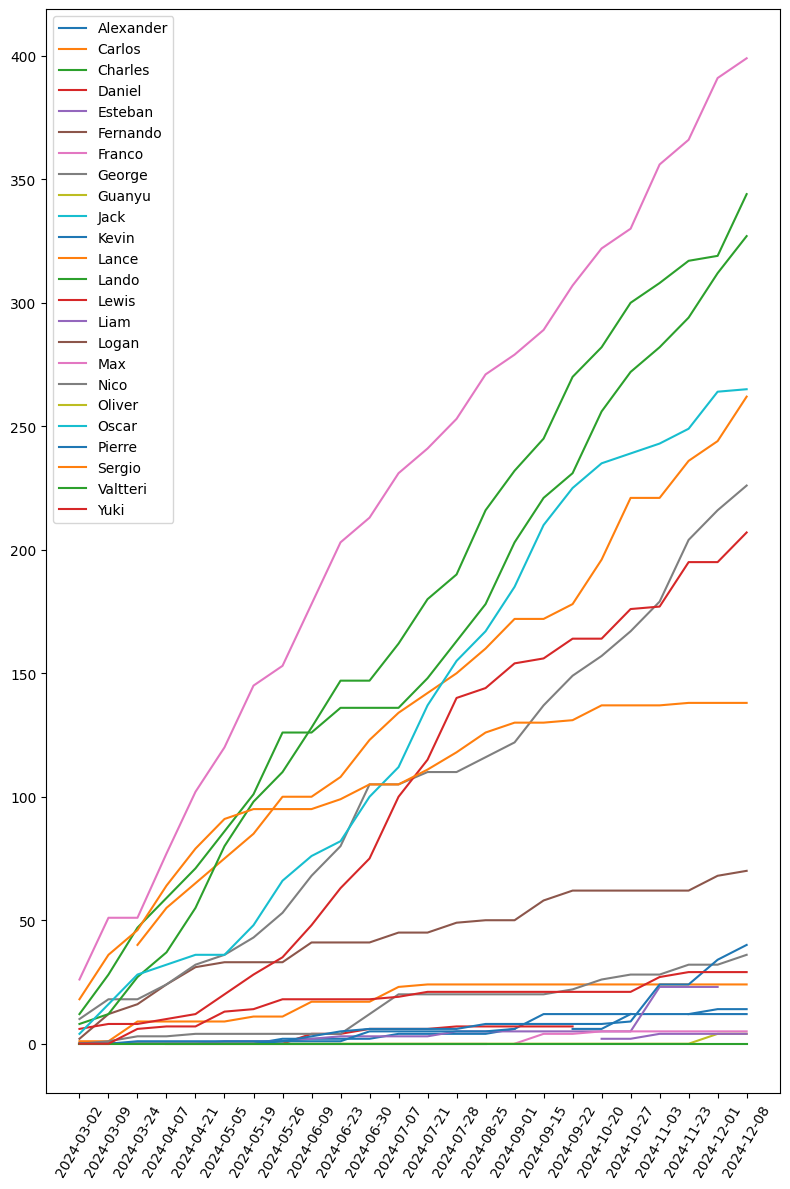

In [76]:
plt.figure(figsize=(8, 12))
for piloto in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[piloto], label=piloto)

plt.xticks(rotation=60)
plt.legend()
plt.tight_layout()